In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import networkx as nx
import itertools

from deap import base, algorithms
from deap import creator
from deap import tools
 
import random
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import linprog
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.DataFrame()
data = pd.read_csv('data.csv', sep=';', decimal=',')
data = data.dropna()
data.head(3)

,Широта,Долгота
0,56.455280,84.951198
1,56.454475,84.937846
2,56.455330,84.975526


In [3]:
len(data)

136

In [4]:
y = data['Широта']
x = data['Долгота']

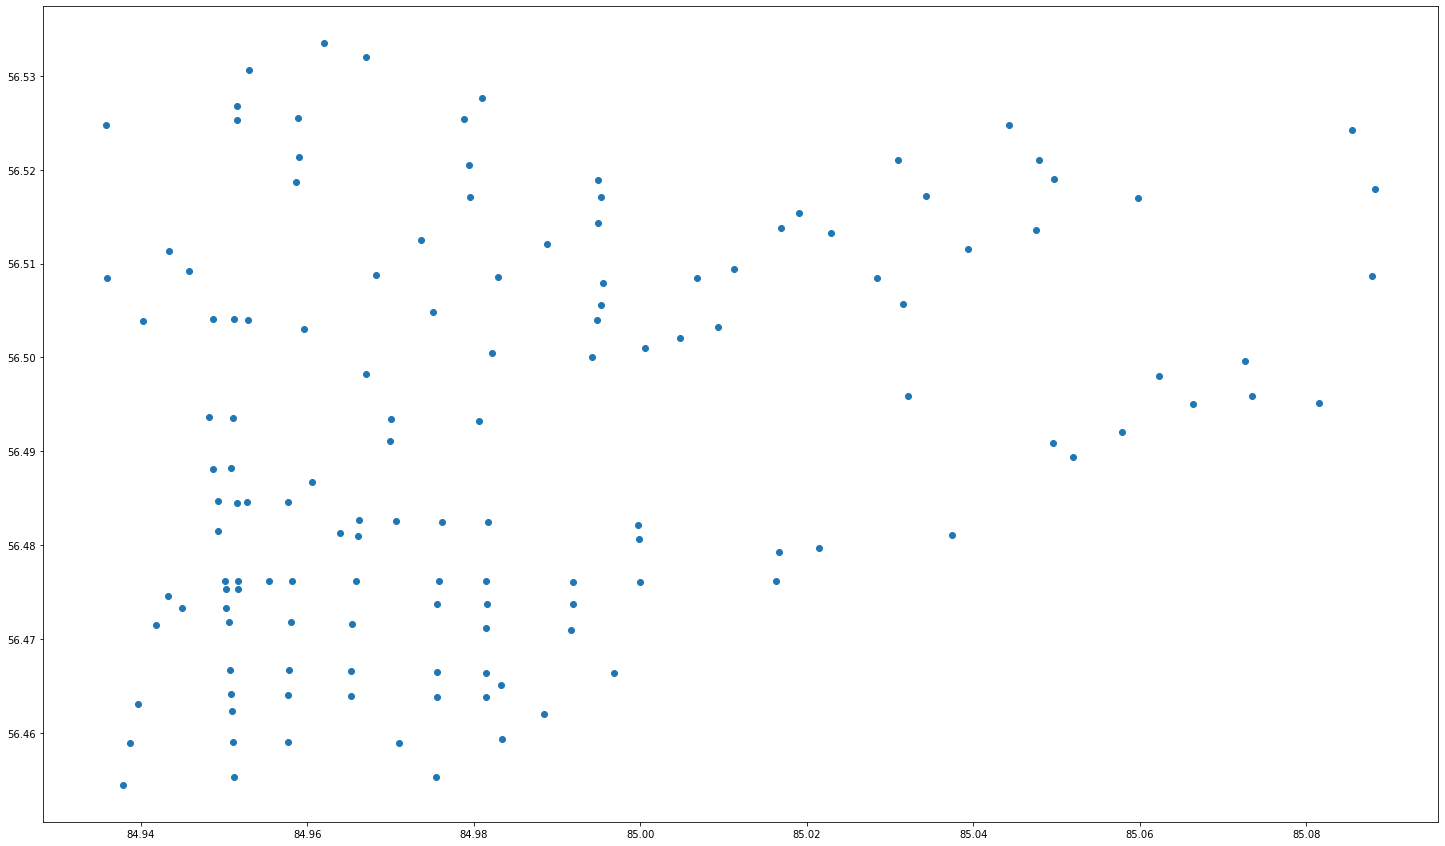

In [5]:
fig, ax = plt.subplots(figsize=(25, 15))
ax.scatter(x, y)

In [6]:
s = []

In [7]:
identic = pd.DataFrame()

In [8]:
lengths = pd.DataFrame()
s = []

In [9]:
km_sh = 111.134861111
km_dol = 111.321377778

In [10]:
for i in range(len(x)):
    for j in range(len(x)):
        s.append(math.sqrt(((x[i]-x[j])*math.cos(x[i])*km_dol)**2+((y[i]-y[j])*km_sh)**2))
    lengths[i] = s
    s = []

In [11]:
lengths

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,1.479202,2.676836,0.415009,2.219652,1.443214,1.543094,0.785100,0.823340,0.991260,...,8.363220,7.095780,7.387117,7.852356,8.705289,8.768890,8.376168,7.947021,7.775685,7.905662
1,1.476801,0.000000,4.146947,1.548567,3.685778,0.499401,0.976480,1.688965,2.240576,1.796606,...,9.078148,7.498456,7.783410,8.229684,9.198450,9.172287,8.626081,8.177277,8.008952,7.814310
2,2.686053,4.168006,0.000000,2.726958,0.636527,4.095566,4.059096,2.824620,2.016673,2.897150,...,7.796070,7.282084,7.555946,8.014235,8.574443,8.809047,8.731545,8.371486,8.209130,8.875791
3,0.415009,1.550810,2.717781,0.000000,2.192498,1.376252,1.344955,0.370163,0.719599,0.576328,...,7.981808,6.685144,6.976423,7.441163,8.301330,8.359466,7.961645,7.532193,7.360858,7.498699
4,2.225573,3.701688,0.636264,2.198572,0.000000,3.578090,3.499189,2.249912,1.477118,2.302904,...,7.438275,6.780449,7.059399,7.522438,8.136321,8.342656,8.215428,7.843425,7.678801,8.286172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,8.769125,9.174678,8.808547,8.359719,8.342502,8.678627,8.202446,7.996946,8.284106,7.794974,...,2.050956,1.680172,1.391343,0.946195,0.575918,0.000000,1.047581,1.372964,1.472476,3.047822
132,8.376169,8.626680,8.729269,7.961646,8.214207,8.127296,7.650196,7.592626,7.973143,7.387060,...,2.900285,1.470642,1.230554,0.865534,1.558891,1.046414,0.000000,0.454726,0.618430,1.998539
133,7.947021,8.177745,8.368651,7.532193,7.841828,7.678324,7.201415,7.162673,7.559385,6.956830,...,3.001261,1.197860,1.021207,0.821905,1.803629,1.371594,0.454716,0.000000,0.171339,1.747052
134,7.775685,8.009430,8.206238,7.360858,7.677170,7.510022,7.033022,6.991341,7.388741,6.785501,...,2.997382,1.075148,0.929149,0.810420,1.865962,1.471198,0.618423,0.171339,0.000000,1.733315


In [12]:
matritsa = pd.DataFrame()
matritsa = pd.read_csv('matritsa.csv', sep=';')

In [13]:
del matritsa['Unnamed: 0']

In [14]:
matritsa

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0.0,0.0,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN
132,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
133,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
134,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
matritsa = matritsa.fillna(0)

In [16]:
matritsa

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
132,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
133,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
134,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
matritsa.to_csv('smej.csv')

In [17]:
i = 0
j = 0

In [18]:
graph = nx.Graph()

In [19]:
def add_edge(f_item, s_item, graph=None):
  graph.add_edge(f_item, s_item)
  graph.add_edge(s_item, f_item) 

In [20]:
for i in range(len(x)):
    graph.add_node(i)

In [21]:
for i in range(len(x)):
    for j in range (len(x)):
        istr = str(i)
        if matritsa[istr][j] == 1:
            graph.add_edge(i,j)
            

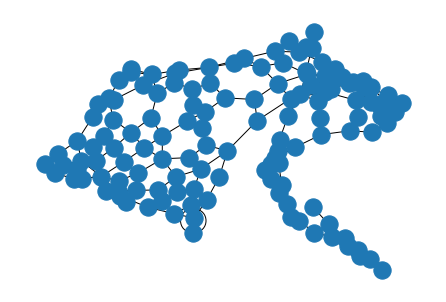

In [22]:
nx.draw(graph)
plt.show()

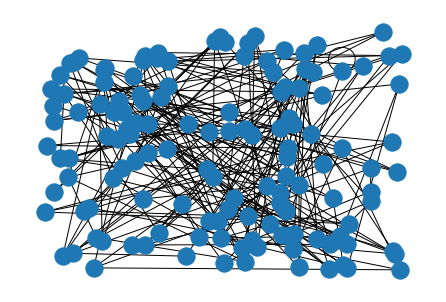

In [23]:
nx.draw_random(graph)
plt.show()

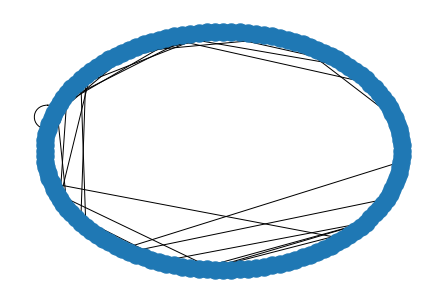

In [24]:
nx.draw_circular(graph)
plt.show()

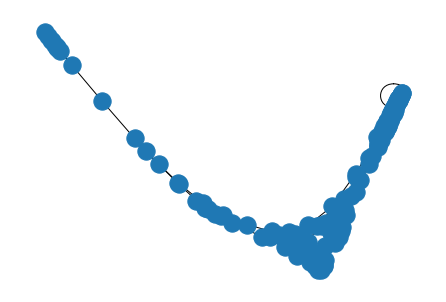

In [25]:
nx.draw_spectral(graph)
plt.show()

In [201]:
otpr = []
naznach = []
for i in range(136):
    otpr.append(random.randint(0, 1000))
    naznach.append(random.randint(0,1000))

In [202]:
sum(otpr)

67264

In [203]:
sum(naznach)

63713

In [204]:
while sum(otpr) != sum(naznach):
    if sum(otpr) > sum(naznach):
        if otpr[random.randint(0,135)] > 0:
            otpr[random.randint(0,135)] -= 1
    elif sum(otpr) < sum(naznach):
        if naznach[random.randint(0,135)] > 0:
            naznach[random.randint(0,135)] -= 1

In [205]:
print(sum(naznach))

63713


In [206]:
print(sum(otpr))

63713


In [34]:
speed = pd.DataFrame()

In [35]:
k = []

In [36]:
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            k.append(0)
        else:
            k.append(random.randrange(20, 60))
    speed[i] = k
    k = []

In [37]:
speed

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0,28,35,36,31,38,29,49,28,29,...,31,23,31,55,38,33,30,37,27,56
1,55,0,53,57,30,35,45,48,46,46,...,56,21,33,36,29,43,27,59,25,48
2,49,27,0,21,56,29,52,43,26,46,...,32,22,38,39,32,29,22,43,27,35
3,51,21,31,0,21,33,34,27,39,43,...,21,53,40,33,56,57,21,32,44,58
4,52,51,40,23,0,33,33,30,50,55,...,53,32,50,56,28,47,38,25,53,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,49,53,24,22,50,57,54,20,38,45,...,57,59,25,30,32,0,50,46,59,51
132,56,33,29,25,26,35,20,44,56,22,...,59,35,29,40,34,48,0,34,47,43
133,30,49,54,57,27,48,37,53,28,40,...,34,32,48,34,22,33,56,0,21,37
134,56,41,27,57,34,30,20,31,48,48,...,56,47,44,39,58,26,48,26,0,26


In [178]:
speed.to_csv('speed.csv')

In [180]:
time = pd.DataFrame()

In [181]:
k = []

In [182]:
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            istr = str(i)
            k.append(0)
            
        else:
            istr = str(i)
            k.append(lengths[i][j]/speed[i][j])
    time[i] = k
    k = []

In [183]:
time

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.052829,0.076481,0.011528,0.071602,0.037979,0.053210,0.016022,0.029405,0.034181,...,0.269781,0.308512,0.238294,0.142770,0.229087,0.265724,0.279206,0.214784,0.287988,0.141173
1,0.026851,0.000000,0.078244,0.027168,0.122859,0.014269,0.021700,0.035187,0.048708,0.039057,...,0.162110,0.357069,0.235861,0.228602,0.317188,0.213309,0.319484,0.138598,0.320358,0.162798
2,0.054817,0.154371,0.000000,0.129855,0.011367,0.141226,0.078060,0.065689,0.077564,0.062982,...,0.243627,0.331004,0.198841,0.205493,0.267951,0.303760,0.396888,0.194686,0.304042,0.253594
3,0.008137,0.073848,0.087670,0.000000,0.104405,0.041705,0.039557,0.013710,0.018451,0.013403,...,0.380086,0.126135,0.174411,0.225490,0.148238,0.146657,0.379126,0.235381,0.167292,0.129288
4,0.042799,0.072582,0.015907,0.095590,0.000000,0.108427,0.106036,0.074997,0.029542,0.041871,...,0.140345,0.211889,0.141188,0.134329,0.290583,0.177503,0.216195,0.313737,0.144883,0.142865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.178962,0.173107,0.367023,0.379987,0.166850,0.152257,0.151897,0.399847,0.218003,0.173222,...,0.035982,0.028477,0.055654,0.031540,0.017997,0.000000,0.020952,0.029847,0.024957,0.059761
132,0.149574,0.261415,0.301009,0.318466,0.315931,0.232208,0.382510,0.172560,0.142378,0.335775,...,0.049157,0.042018,0.042433,0.021638,0.045850,0.021800,0.000000,0.013374,0.013158,0.046478
133,0.264901,0.166893,0.154975,0.132144,0.290438,0.159965,0.194633,0.135145,0.269978,0.173921,...,0.088272,0.037433,0.021275,0.024174,0.081983,0.041563,0.008120,0.000000,0.008159,0.047218
134,0.138852,0.195352,0.303935,0.129138,0.225799,0.250334,0.351651,0.225527,0.153932,0.141365,...,0.053525,0.022875,0.021117,0.020780,0.032172,0.056585,0.012884,0.006590,0.000000,0.066666


In [184]:
time.to_csv('time.csv')

In [185]:
for i in range(len(x)):
    for j in range(len(x)):
        if i == j:
            if time[i][j] != 0:
                time[i][j] = 0

In [186]:
graph = nx.Graph()

In [187]:
def add_edge(f_item, s_item, graph=None):
  graph.add_edge(f_item, s_item)
  graph.add_edge(s_item, f_item) 

In [188]:
for i in range(len(x)):
    graph.add_node(i)

In [189]:
for i in range(len(x)):
    for j in range (len(x)):
        istr = str(i)
        if matritsa[istr][j] == 1:
            graph.add_edge(i,j,weight=time[i][j])

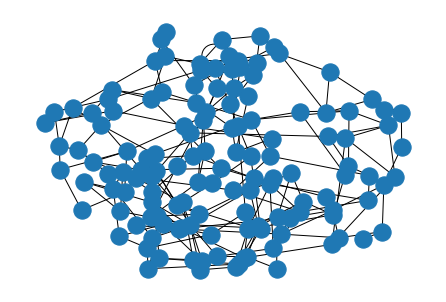

In [190]:
nx.draw(graph)
plt.show()

In [191]:
path = nx.all_pairs_dijkstra_path_length(graph)

In [192]:
path = list(path)

In [193]:
graphlengths = pd.DataFrame()

In [194]:
for i in range(len(path)):
    graphlengths[i] = pd.Series(path[i][1]).sort_index()

In [195]:
graphlengths

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.052829,0.070888,0.011528,0.059522,0.053233,0.061324,0.025238,0.029979,0.063036,...,0.292060,0.235246,0.245294,0.253528,0.294694,0.270254,0.249302,0.235928,0.227769,0.283145
1,0.052829,0.000000,0.115333,0.055973,0.103967,0.014269,0.022360,0.066962,0.074424,0.107481,...,0.271261,0.214447,0.224495,0.232729,0.273894,0.249454,0.228503,0.215129,0.206970,0.262346
2,0.070888,0.115333,0.000000,0.059360,0.011367,0.101065,0.102137,0.057534,0.040909,0.060194,...,0.286147,0.229333,0.239381,0.247615,0.288781,0.264341,0.243389,0.230015,0.221856,0.277232
3,0.011528,0.055973,0.059360,0.000000,0.047994,0.041705,0.049796,0.013710,0.018451,0.051508,...,0.280532,0.223718,0.233766,0.242000,0.283165,0.258726,0.237774,0.224400,0.216241,0.271617
4,0.059522,0.103967,0.011367,0.047994,0.000000,0.089698,0.097789,0.057405,0.029542,0.060065,...,0.286018,0.229204,0.239252,0.247486,0.288651,0.264212,0.243260,0.229886,0.221727,0.277103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.270254,0.249454,0.264341,0.258726,0.264212,0.235186,0.227095,0.261594,0.240274,0.226836,...,0.083157,0.085643,0.075595,0.067361,0.026195,0.000000,0.020952,0.034326,0.042485,0.081544
132,0.249302,0.228503,0.243389,0.237774,0.243260,0.214234,0.206143,0.240642,0.219323,0.205885,...,0.090110,0.069860,0.059812,0.051578,0.047147,0.020952,0.000000,0.013374,0.021533,0.060592
133,0.235928,0.215129,0.230015,0.224400,0.229886,0.200860,0.192769,0.227268,0.205949,0.192510,...,0.076736,0.056486,0.046438,0.038204,0.060521,0.034326,0.013374,0.000000,0.008159,0.047218
134,0.227769,0.206970,0.221856,0.216241,0.221727,0.192701,0.184610,0.219109,0.197790,0.184351,...,0.068577,0.048327,0.038279,0.030045,0.068680,0.042485,0.021533,0.008159,0.000000,0.055377


In [196]:
graphlengths.to_csv('weightlenths.csv')

In [197]:
a = np.array(otpr)
b = np.array(naznach)

In [198]:
D = np.array(graphlengths)

In [199]:
# Необходима функция нахождения индексов минимального элемента матрицы
def ij(c_min):
    c = np.inf
    for i in range(c_min.shape[0]):
        for j in range(c_min.shape[1]):
            if (c_min[i, j] !=0) and (c_min[i, j]<c):
                c = c_min[i, j]
                i_, j_ = i, j
    return i_, j_

# Функция минимального элемента
def M_min(a_, b_, c_, print_ = False):
    a = np.copy(a_)
    b = np.copy(b_)
    c = np.copy(c_)
    
    # Проверяем условие замкнутости: если не замкнута - меняем соотвествующие векторы и матрицу трансп. расходов
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    x = np.zeros((m, n), dtype=int) # создаем матрицу для x и заполняем нулями
    funk = 0
    while True:
        c_min = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                c_min[i, j] = (c[i, j]*min(a[i], b[j])) # составляем матрицу суммарных расходов
        i, j = ij(c_min) # определяем индексы минимального элемента составленной матрицы суммарных расходов
        x_ij = int(min(a[i], b[j]))
        x[i, j] = x_ij # добавляем элемент x_ij в матрицу x
        funk += int(c_min[i, j]) # добавляем x_ij в итоговую функцию
        a[i] -= x_ij #
        b[j] -= x_ij # обновляем векторы a и b
        if print_:
            print('c_min:')
            print(c_min.astype(int))
            print('a: ', a)
            print('b: ', b)
            print()
        if len(c_min[c_min>0])==1: # повторяем до сходимости метода
            break
    return x, funk # возращаем матрицу x и целевую функцию

In [200]:
x, funk = M_min(a, b, D, print_ = True)
print('x: ')
print(x)
print('Целевая функция: ', funk)

c_min:
[[  0   0  53 ... 176 153 155]
 [  9   0  29 ...  55  52  67]
 [ 12   0   0 ...  46  45  56]
 ...
 [ -4  -4  -4 ...   0   0   0]
 [ 41   1  66 ...   2   0  16]
 [ 51   1 150 ...  25  30   0]]
a:  [749 256 204 745 107 410 695 866 367 477 636 215 627 516 281  39 185 221
 446 496 268 725 624 270 352 552 509  78 170 -18 926 131 691 921 968 778
 299 215   8 536 661 896 704 895 580 779 437 338 325 364 496 122 425 450
 751 173 -13 519 405 372 770 363 787 676 221 370 651 961 869  48 473 292
 590 161 126 904 483 619 134 639 212 691 241 300 574 119 936  46 919 112
 759 204 390 790 175 969 106 579 727 620 560 755 232 293 729 151 907 664
  -6  38 376 378 226 314 656 939  58 394 291 138 311 803 208 602 238 920
 298 702 383 431 403 813 951   0 300 544]
b:  [ 182    7  976   86  351  699   37  921  210  310  839  191  863  369
  806  598  248  122  777  623  623   63  219  565  145  103  678  298
  191  241  271  525  904  603  559  589  389  211  329  942  563  838
   72   52  729 1000   36  

In [170]:
def sev_zap(a_, b_, c_):
    a = np.copy(a_)
    b = np.copy(b_)
    c = np.copy(c_)
    
    # Проверяем условие замкнутости:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    i = 0
    j = 0
    funk = 0
    x = np.zeros((m, n), dtype=int)
    while (i<m) and (j<n): # повторяем цикл до сходимости метода
        x_ij = min(a[i], b[j]) # проверяем минимальность a_i и b_j
        funk += c[i, j]*min(a[i], b[j]) # записываем в итоговую функцию элемент трат
        a[i] -= x_ij #
        b[j] -= x_ij # обновляем векторы a и b
        x[i, j] = x_ij # добавляем элемент x_ij в матрицу x
    
        if a[i]>b[j]: # делаем сдвиги при выполнении условий
            j += 1
        elif a[i]<b[j]:
            i += 1
        else:
            i += 1
            j += 1
    return x, funk # возращаем матрицу x и целевую функцию

In [171]:
# Для метода потенциалов потребуется матрица дельт
# На вход она получает x - матрицу одного из опорных методов
def delta(a, b, c, x): 
        # Проверяем условие замкнутости:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
    
    m = len(a)
    n = len(b)
    
    u = np.zeros(m)
    v = np.zeros(n)

    for i in range(m):
        for j in range(n):
            if x[i, j] != 0: # если элемент матрицы x не равен 0, расчитываем для данных индексов векторы u и v
                if v[j] != 0:
                    u[i] = c[i, j]-v[j]
                else:
                    v[j] = c[i, j]-u[i]

    delta = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            delta[i, j] = u[i] + v[j] - c[i, j] # расчитываем элемент дельта матрицы
    return delta

In [172]:
# Функция возвращает матрицу системы ограничений
def prepare(a, b):
    m = len(a)
    n = len(b)
    h = np.diag(np.ones(n))
    v = np.zeros((m, n))
    v[0] = 1
    for i in range(1, m):
        h = np.hstack((h, np.diag(np.ones(n))))
        k = np.zeros((m, n))
        k[i]=1
        v = np.hstack((v, k))
    return np.vstack((h, v)).astype(int), np.hstack((b,a))

# Метод потенциалов
def potenz(a_, b_, c_):
    a = np.copy(a_)
    b = np.copy(b_)
    c = np.copy(c_)
    # Проверяем условие замкнутости:
    if a.sum() > b.sum():
        b = np.hstack((b, [a.sum() - b.sum()]))
        c = np.hstack((c, np.zeros(len(a)).reshape(-1, 1)))
    elif a.sum() < b.sum():
        a = np.hstack((a, [b.sum() - a.sum()]))
        c = np.vstack((c, np.zeros(len(b))))
        
    m = len(a)
    n = len(b)
    A_eq, b_eq = prepare(a, b)
    res = linprog(c.reshape(1, -1), A_eq=A_eq, b_eq=b_eq, bounds=(0, None), method='simplex')
    return res.x.astype(int).reshape(m, n), res.fun.astype(int) # возращаем матрицу x и целевую функцию

In [173]:
print('Матрица системы ограничений: \n', prepare(a, b)[0])

Матрица системы ограничений: 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]]


In [174]:
x, funk = M_min(a, b, D)
print('Метод минимального элемента: \n', x)
print('Целевая функция: ', funk)
print()
print('Дельта матрица для М - метода: \n', delta(a, b, D, x))

Метод минимального элемента: 
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 300   0   0]
 [  0   0   0 ...   0   0   0]]
Целевая функция:  2373

Дельта матрица для М - метода: 
 [[ 0.01152802 -0.03856004 -0.05952163 ... -0.22255355 -0.16829272
  -0.1506448 ]
 [-0.04130061  0.01426859 -0.10396679 ... -0.20175424 -0.14749341
  -0.12984549]
 [-0.05936017 -0.10106477  0.01136656 ... -0.21664053 -0.1623797
  -0.14473178]
 ...
 [-0.22739682 -0.20385695 -0.22164527 ...  0.01037729  0.04832014
   0.08228604]
 [-0.22145613 -0.19791625 -0.21570457 ...  0.          0.05426083
   0.07190875]
 [-0.29455031 -0.27101044 -0.28879876 ... -0.0567762  -0.01883335
   0.10956778]]


In [175]:
x1, funk1 = sev_zap(a, b, D)
print('Метод северо-западного угла: \n', x1)
print('Целевая функция: ', funk1)
print()
print('Дельта матрица для метода северо-западного угла: \n', delta(a, b, D, x1))

Метод северо-западного угла: 
 [[182   7 560 ...   0   0   0]
 [  0   0 256 ...   0   0   0]
 [  0   0 160 ...   0   0   0]
 ...
 [  0   0   0 ...   0 -21   0]
 [  0   0   0 ...   0 296   4]
 [  0   0   0 ...   0   0 544]]
Целевая функция:  4660.085036181725

Дельта матрица для метода северо-западного угла: 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.48102443e+00
   1.49734242e+00  1.49734242e+00]
 [-8.38347218e-03  9.72737910e-02  0.00000000e+00 ...  1.54626890e+00
   1.56258689e+00  1.56258689e+00]
 [-1.41776388e-01 -1.33392916e-01  0.00000000e+00 ...  1.41604925e+00
   1.43236724e+00  1.43236724e+00]
 ...
 [-1.95288011e+00 -1.87925218e+00 -1.87607891e+00 ...  0.00000000e+00
   9.19403442e-17  1.63179846e-02]
 [-1.95288011e+00 -1.87925218e+00 -1.87607891e+00 ... -1.63179846e-02
   0.00000000e+00  1.04083409e-16]
 [-2.06363333e+00 -1.99000539e+00 -1.98683212e+00 ... -1.10753213e-01
  -1.10753213e-01  0.00000000e+00]]
